In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import generate_data
import matplotlib.pyplot as plt
import numpy as np
import theano 
import theano.tensor as T

X, Y = generate_data.generate_1dlinear_data()

Couldn't import dot_parser, loading of dot files will not be possible.


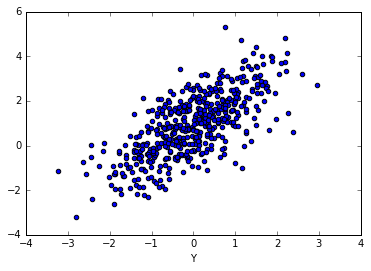

In [3]:
%matplotlib inline

plt.scatter(X, Y)
plt.xlabel("X")
plt.xlabel("Y")

## Learning a linear model

In [4]:
import pymc3
from pymc3.distributions import  Normal, HalfNormal
from pymc3 import Model

In [5]:
basic_model = Model()

with basic_model:

    # Priors for unknown model parameters
    alpha = Normal('alpha', mu=0, sd=10)
    beta = Normal('beta', mu=0, sd=10, shape=1)
    sigma = HalfNormal('sigma', sd=1)

    # Expected value of outcome
    mu = alpha + beta*X
    
    # Likelihood (sampling distribution) of observations
    Y_obs = Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

Applied log-transform to sigma and added transformed sigma_log_ to model.


In [7]:
from scipy import optimize
import pprint 
# Point estimate of the parameters
MAP = pymc3.find_MAP(model=basic_model, fmin=optimize.fmin_powell)

pprint.pprint(MAP)

{'alpha': array(0.9598645297781615),
 'beta': array([ 1.00952184]),
 'sigma_log_': array(-0.0016729835529033423)}


In [8]:
def model_prediction(X, alpha, beta):
    return  alpha + beta * X

In [9]:
X_grid = np.linspace(-4, 4, 200)

In [10]:
predictions = model_prediction(X_grid, MAP["alpha"],MAP["beta"])

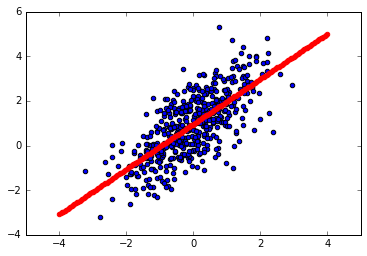

In [11]:
%matplotlib inline

## plot data
plt.scatter(X, Y)

# crate grid for the predictions
x1_grid = np.linspace(-4, 4, 200)

# Write 
plt.scatter(x1_grid,
            predictions,
            color="r")

### Bayesian inference regression line

In [12]:
basic_model = Model()

with basic_model:

    # Priors for unknown model parameters
    alpha = Normal('alpha', mu=0, sd=10)
    beta = Normal('beta', mu=0, sd=10)
    sigma = HalfNormal('sigma', sd=1)

    # Expected value of outcome
    mu = alpha + beta*X
    
    # Likelihood (sampling distribution) of observations
    Y_obs = Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

Applied log-transform to sigma and added transformed sigma_log_ to model.


In [13]:
with Model() as model:
      
    # Priors for unknown model parameters
    alpha = Normal('alpha', mu=0, sd=10)
    beta = Normal('beta', mu=0, sd=10)
    sigma = HalfNormal('sigma', sd=1)
    
    # Expected value of outcome
    mu = alpha + beta*X

    # Define likelihood
    likelihood = pymc3.Normal('y', 
                              mu= mu,
                              sd=sigma, 
                              observed=Y)
       
    # Inference!
    start = pymc3.find_MAP() # Find starting value by optimization
    step = pymc3.NUTS(scaling=start) # Instantiate MCMC sampling algorithm
    trace = pymc3.sample(2000, step, start=start, progressbar=True) # draw 2000 posterior samples using NUTS sampling

Applied log-transform to sigma and added transformed sigma_log_ to model.
 [-----------------100%-----------------] 2000 of 2000 complete in 2.1 sec

In [14]:
start

{'alpha': array(0.9598645287172723),
 'beta': array(1.0095219371504889),
 'sigma_log_': array(-0.0016784430569460995)}

In [15]:
def model_prediction(X, alpha, beta):
    return  alpha + beta * X

In [16]:
X_grid = np.linspace(-4, 4, 200)

In [20]:
predictions_MAP = model_prediction(X_grid, 
                                   start["alpha"],
                                   start["beta"])

In [22]:
mean_alpha = trace["alpha"].mean()
mean_beta = trace["beta"].mean()

std_alpha = trace["alpha"].std()
std_beta = trace["beta"].std()

predictions_trace = model_prediction(X_grid, 
                                     mean_alpha, 
                                     mean_beta)

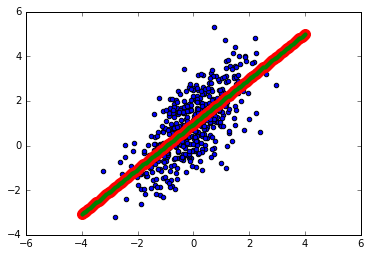

In [23]:
%matplotlib inline

## plot data
plt.scatter(X, Y)

# crate grid for the predictions
x1_grid = np.linspace(-4, 4, 200)

# Write 
plt.scatter(x1_grid,
            predictions_trace  ,
            color="r", 
            s=100)

plt.scatter(x1_grid,
            predictions_MAP  ,
            color="g",
            s=10)

### Results of the bayesian inference

In [24]:
trace["sigma"]

array([ 0.99901649,  0.99901649,  0.98894491, ...,  1.02031131,
        1.02031131,  0.93577016])

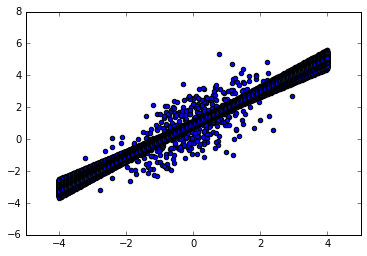

In [25]:
%matplotlib inline

## plot data
plt.scatter(X, Y)

# crate grid for the predictions
x1_grid = np.linspace(-4, 4, 200)

num_models = len(trace)
for i in range(num_models):
    prediction = model_prediction(x1_grid, 
                                  trace["alpha"][i],
                                  trace["beta"][i])
    
    plt.scatter(x1_grid, prediction)